In [1]:
import csv
import urllib
import io
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

Load measurements for all coins:

In [2]:
data_btc = pd.read_csv('.\\data\\btc.csv', index_col=False);
data_btc['date'] = pd.to_datetime(data_btc['date']);

data_dcr = pd.read_csv('.\\data\\dcr.csv', index_col=False);
data_dcr['date'] = pd.to_datetime(data_dcr['date']);

data_doge = pd.read_csv('.\\data\\doge.csv', index_col=False);
data_doge['date'] = pd.to_datetime(data_doge['date']);

data_etc = pd.read_csv('.\\data\\etc.csv', index_col=False);
data_etc['date'] = pd.to_datetime(data_etc['date'])

data_eth = pd.read_csv('.\\data\\eth.csv', index_col=False);
data_eth['date'] = pd.to_datetime(data_eth['date'])

data_ltc = pd.read_csv('.\\data\\ltc.csv', index_col=False);
data_ltc['date'] = pd.to_datetime(data_ltc['date'])

data_xmr = pd.read_csv('.\\data\\xmr.csv', index_col=False);
data_xmr['date'] = pd.to_datetime(data_xmr['date'])

data_xrp = pd.read_csv('.\\data\\xrp.csv', index_col=False);
data_xrp['date'] = pd.to_datetime(data_xrp['date'])

data_dash = pd.read_csv('.\\data\\dash.csv', index_col=False);
data_dash['date'] = pd.to_datetime(data_dash['date'])

data_vtc = pd.read_csv('.\\data\\vtc.csv', index_col=False);
data_vtc['date'] = pd.to_datetime(data_vtc['date'])

Merge data:

In [3]:
def generate_new_column_names(coin, columns):
    res = {}
    for column in columns:
        if column != 'date':
            res[column]=coin+"_"+column
    return res

def select_values_after_date(dataset, date):
    mask = (dataset['date'] > pd.to_datetime(date))
    return dataset.loc[mask]

#General columns
columns_general = list(data_btc)

#Selected date
selected_date = '2015-08-10'

#Repeat for all coins we track
#BTC
columns_btc_new = generate_new_column_names('BTC', columns_general)
new_btc = data_btc[columns_general]
new_btc = select_values_after_date(new_btc, selected_date).rename(index=str, columns=columns_btc_new);
new_btc = new_btc.reset_index(drop=True);

#DCR
columns_dcr_new = generate_new_column_names('DCR', columns_general)
new_dcr = data_dcr[columns_general]
new_dcr = select_values_after_date(new_dcr, selected_date).rename(index=str, columns=columns_dcr_new);
new_dcr = new_dcr.reset_index(drop=True);

#DOGE
columns_doge_new = generate_new_column_names('DOGE', columns_general)
new_doge = data_doge[columns_general]
new_doge = select_values_after_date(new_doge, selected_date).rename(index=str, columns=columns_doge_new);
new_doge = new_doge.reset_index(drop=True);

#ETC
columns_etc_new = generate_new_column_names('ETC', columns_general)
new_etc = data_etc[columns_general]
new_etc = select_values_after_date(new_etc, selected_date).rename(index=str, columns=columns_etc_new);
new_etc = new_etc.reset_index(drop=True);

#ETH
columns_eth_new = generate_new_column_names('ETH', columns_general)
new_eth = data_eth[columns_general]
new_eth = select_values_after_date(new_eth, selected_date).rename(index=str, columns=columns_eth_new);
new_eth = new_eth.reset_index(drop=True);

#LTC
columns_ltc_new = generate_new_column_names('LTC', columns_general)
new_ltc = data_ltc[columns_general]
new_ltc = select_values_after_date(new_ltc, selected_date).rename(index=str, columns=columns_ltc_new);
new_ltc = new_ltc.reset_index(drop=True);

#XMR
columns_xmr_new = list(columns_general)
columns_xmr_new.remove('generatedCoins')
columns_xmr_new.remove('txVolume(USD)')
new_xmr = data_xmr[columns_xmr_new]
columns_xmr_new = generate_new_column_names('XMR', columns_xmr_new)
new_xmr = select_values_after_date(new_xmr, selected_date).rename(index=str, columns=columns_xmr_new);
new_xmr = new_xmr.reset_index(drop=True);

#XRP
columns_xrp_new = list(columns_general)
columns_xrp_new.remove('generatedCoins')
new_xrp = data_xrp[columns_xrp_new]
columns_xrp_new = generate_new_column_names('XRP', columns_xrp_new)
new_xrp = select_values_after_date(new_xrp, selected_date).rename(index=str, columns=columns_xrp_new);
new_xrp = new_xrp.reset_index(drop=True);

#DASH
columns_dash_new = generate_new_column_names('DASH', columns_general)
new_dash = data_dash[columns_general]
new_dash = select_values_after_date(new_dash, selected_date).rename(index=str, columns=columns_dash_new);
new_dash = new_dash.reset_index(drop=True);

#VTC
columns_vtc_new = generate_new_column_names('VTC', columns_general)
new_vtc = data_vtc[columns_general]
new_vtc = select_values_after_date(new_vtc, selected_date).rename(index=str, columns=columns_vtc_new);
new_vtc = new_vtc.reset_index(drop=True);

merged_data = pd.merge(new_btc, new_dcr, on='date', how='outer')
merged_data = pd.merge(merged_data, new_doge, on='date', how='outer')
merged_data = pd.merge(merged_data, new_etc, on='date', how='outer')
merged_data = pd.merge(merged_data, new_eth, on='date', how='outer')
merged_data = pd.merge(merged_data, new_ltc, on='date', how='outer')
merged_data = pd.merge(merged_data, new_xmr, on='date', how='outer')
merged_data = pd.merge(merged_data, new_xrp, on='date', how='outer')
merged_data = pd.merge(merged_data, new_dash, on='date', how='outer')
merged_data = pd.merge(merged_data, new_vtc, on='date', how='outer')

#fill NAN values with 0
merged_data.fillna(0, inplace=True)

#Save result
merged_data.to_csv('merged_data.csv');
display(merged_data.head())
print("Number of entries: "  + str(merged_data.size))

,date,BTC_txVolume(USD),BTC_txCount,BTC_marketcap(USD),BTC_price(USD),BTC_exchangeVolume(USD),BTC_generatedCoins,BTC_fees,DCR_txVolume(USD),DCR_txCount,...,DASH_exchangeVolume(USD),DASH_generatedCoins,DASH_fees,VTC_txVolume(USD),VTC_txCount,VTC_marketcap(USD),VTC_price(USD),VTC_exchangeVolume(USD),VTC_generatedCoins,VTC_fees
0,2015-08-11,2.799356e+08,117239,3.828500e+09,264.34,25433900.0,4200.0,26.633347,0.0,0.0,...,73134.0,3391.142859,0.817303,36888.628693,819,1137930.0,0.065510,2458.0,31850.0,0.806200
1,2015-08-12,3.124407e+08,116367,3.920210e+09,270.60,26815400.0,3075.0,25.367459,0.0,0.0,...,113443.0,3434.785716,0.747212,18489.719257,1020,1092480.0,0.062778,2453.0,32800.0,1.073400
2,2015-08-13,3.386269e+08,117871,3.857090e+09,266.18,27685500.0,3750.0,25.047151,0.0,0.0,...,66249.0,3395.785716,0.742809,12354.928720,927,1068060.0,0.061259,9185.0,30550.0,1.297600
3,2015-08-14,3.291484e+08,111030,3.828340e+09,264.13,27091200.0,3375.0,24.336399,0.0,0.0,...,74860.0,3298.285717,1.507882,5168.031022,831,989776.0,0.056670,8447.0,26300.0,0.897979
4,2015-08-15,2.545217e+08,98422,3.849530e+09,265.53,19321100.0,3350.0,20.990425,0.0,0.0,...,37005.0,3286.214288,2.156225,4134.540313,930,1037190.0,0.059295,9534.0,27500.0,0.981386


Number of entries: 69224



## Unsupervised learning

In [4]:
k_means_data = merged_data.drop('date', axis=1)

#Select coin prices
#coin_price_label = [ 'BTC_price(USD)', 'VTC_price(USD)', 'LTC_price(USD)','ETH_price(USD)']
#k_means_data = k_means_data[coin_price_label]

silhouette_avg_array = []
silhouette_sample_array = []
silhouette_labels_array = []
data_kmeans = StandardScaler().fit_transform(k_means_data.values)

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=3123256995)
    labels = kmeans.fit_predict(data_kmeans)
    centroids = kmeans.cluster_centers_
    
    silhouette_avg = silhouette_score(data_kmeans, labels)
    sample_silhouette_values = silhouette_samples(data_kmeans, labels)
    
    print("Silhuette score for " + str(i) + " clusters: " + str(silhouette_avg))
    silhouette_avg_array.append(silhouette_avg)
    silhouette_sample_array.append(sample_silhouette_values)
    silhouette_labels_array.append(labels)

print("Best number of clusters " + str(silhouette_avg_array.index(max(silhouette_avg_array))+2))
print(max(silhouette_avg_array))

Silhuette score for 2 clusters: 0.510570786696885
Silhuette score for 3 clusters: 0.3962821583183834
Silhuette score for 4 clusters: 0.3462636488855415
Silhuette score for 5 clusters: 0.24912910665058954
Silhuette score for 6 clusters: 0.25957237133947736
Silhuette score for 7 clusters: 0.2602033842507597
Silhuette score for 8 clusters: 0.23981621125050948
Silhuette score for 9 clusters: 0.25909519876844983
Silhuette score for 10 clusters: 0.23218046087522948
Best number of clusters 2
0.510570786696885


Sum of all labels: 1
Average across all labels: 0.0009823182711198428


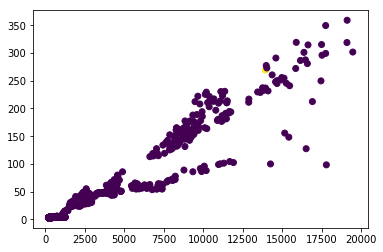

In [5]:
kmeans = KMeans(n_clusters=2, random_state=3123256995)
labels = kmeans.fit_predict(k_means_data)
centroids = kmeans.cluster_centers_


standarized_data = pd.DataFrame(k_means_data, columns=k_means_data.columns)

plt.scatter(x=standarized_data['BTC_price(USD)'], y=standarized_data['LTC_price(USD)'], c=labels)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.8);
print("Sum of all labels: " +str(labels.sum()))
print("Average across all labels: " +str(np.average(labels)))

In [6]:
bt_img = urllib.request.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
dcr_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/9/98/Decred_logo_full_color.png")
doge_img = urllib.request.urlopen("http://dogecoin.com/imgs/dogecoin-300.png")
etc_img = urllib.request.urlopen("https://en.bitcoinwiki.org/upload/en/images/f/f7/Ethclassic.png")
eth_img = urllib.request.urlopen("https://en.bitcoinwiki.org/upload/en/images/7/7a/Ethereum11.png")
ltc_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/f/f8/LTC-400.png")
xmr_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Monero-Logo.svg/2000px-Monero-Logo.svg.png")
xrp_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Ripple_logo.svg/2000px-Ripple_logo.svg.png")
dash_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/1/1e/Dash_Logo_Tharp_%26_Clark.png")
vtc_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Vertcoin.svg/1920px-Vertcoin.svg.png")


In [12]:
image_file = io.BytesIO(bt_img.read())
bitcoin_im = Image.open(image_file)

image_file = io.BytesIO(dcr_img.read())
dcr_im = Image.open(image_file)
dcr_im = dcr_im.resize((int(bitcoin_im.size[0]*1.2), int(bitcoin_im.size[1])), Image.ANTIALIAS)

image_file = io.BytesIO(doge_img.read())
doge_im = Image.open(image_file)
doge_im = doge_im.resize((int(bitcoin_im.size[0]*0.7), int(bitcoin_im.size[1]*0.65)), Image.ANTIALIAS)

image_file = io.BytesIO(eth_img.read())
eth_im = Image.open(image_file)
eth_im = eth_im.resize((int(bitcoin_im.size[0]), int(bitcoin_im.size[1]*0.8)), Image.ANTIALIAS)

image_file = io.BytesIO(etc_img.read())
etc_im = Image.open(image_file)
etc_im = etc_im.resize((int(bitcoin_im.size[0]*0.8), int(bitcoin_im.size[1]*0.7)), Image.ANTIALIAS)

image_file = io.BytesIO(ltc_img.read())
ltc_im = Image.open(image_file)
ltc_im = ltc_im.resize((int(bitcoin_im.size[0]*0.8), int(bitcoin_im.size[1]*0.7)), Image.ANTIALIAS)

image_file = io.BytesIO(xmr_img.read())
xmr_im = Image.open(image_file)
xmr_im = xmr_im.resize((int(bitcoin_im.size[0]*1.5), int(bitcoin_im.size[1]*0.7)), Image.ANTIALIAS)

image_file = io.BytesIO(xrp_img.read())
xrp_im = Image.open(image_file)
xrp_im = xrp_im.resize((int(bitcoin_im.size[0]*1.0), int(bitcoin_im.size[1]*0.7)), Image.ANTIALIAS)

image_file = io.BytesIO(dash_img.read())
dash_im = Image.open(image_file)
dash_im = dash_im.resize((int(bitcoin_im.size[0]*0.8), int(bitcoin_im.size[1]*0.7)), Image.ANTIALIAS)

image_file = io.BytesIO(vtc_img.read())
vtc_im = Image.open(image_file)
vtc_im = vtc_im.resize((int(bitcoin_im.size[0]*0.8), int(bitcoin_im.size[1]*0.7)), Image.ANTIALIAS)

OSError: cannot identify image file <_io.BytesIO object at 0x000002130B82E3B8>

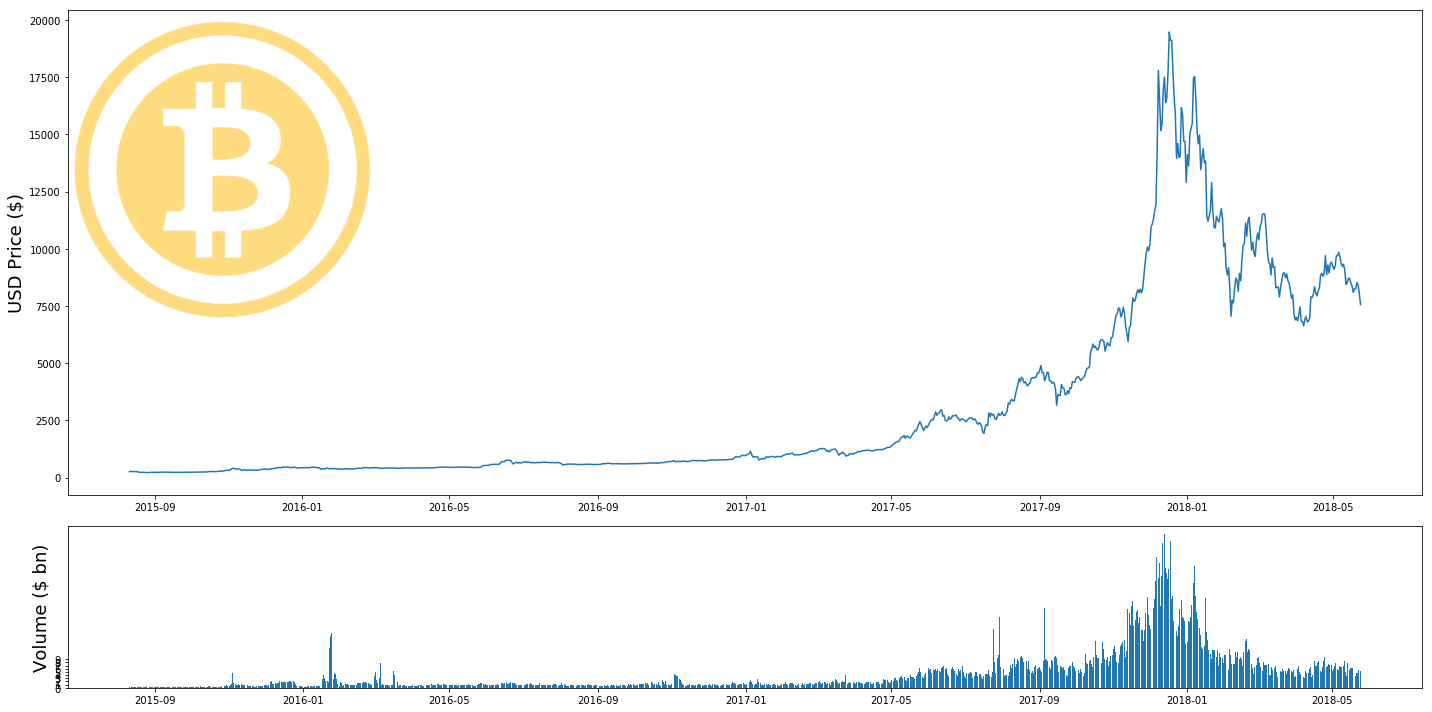

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]},figsize=(20,10))
ax1.set_ylabel('USD Price ($)',fontsize=18)
ax2.set_ylabel('Volume ($ bn)',fontsize=18)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.plot(merged_data['date'],merged_data['BTC_price(USD)'])
ax2.bar(merged_data['date'].values, merged_data['BTC_txVolume(USD)'].values)
fig.tight_layout()
fig.figimage(bitcoin_im, -100, 300, zorder=3,alpha=.5)

plt.show()

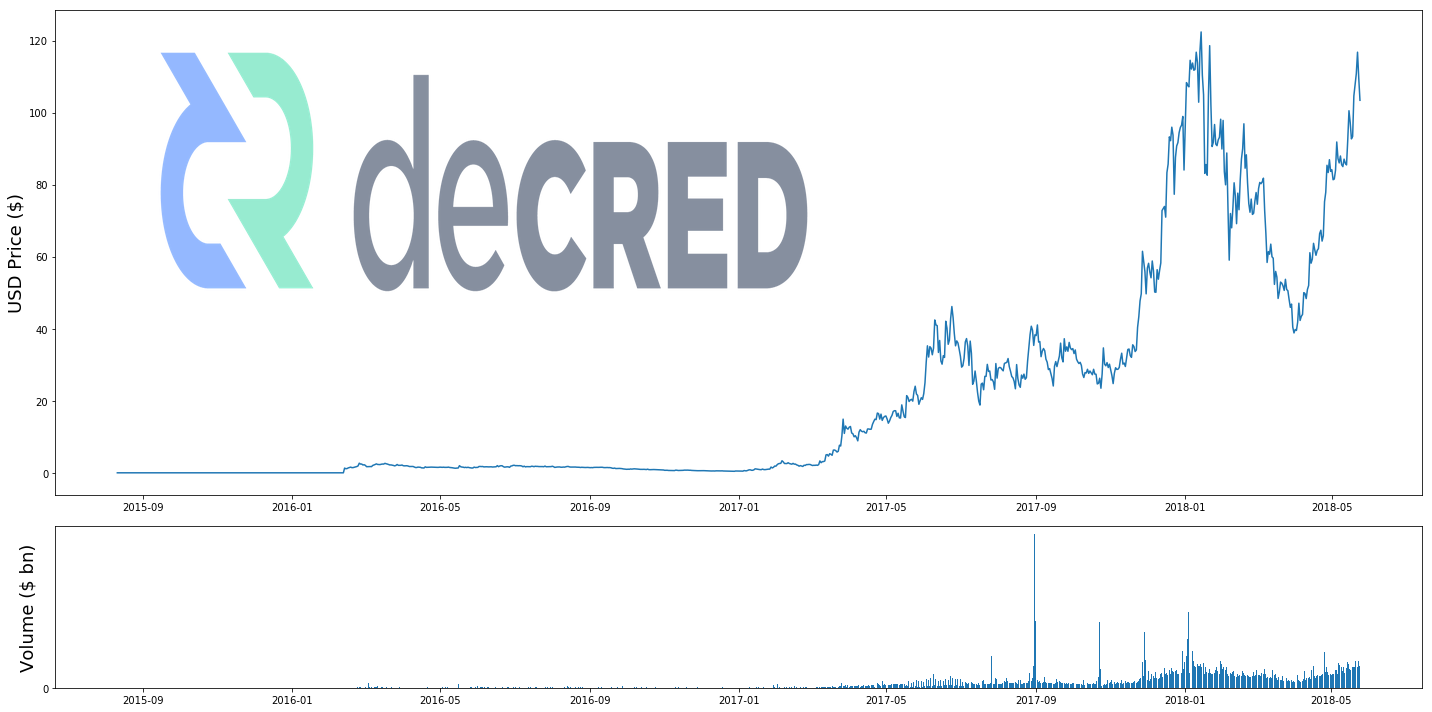

In [9]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]},figsize=(20,10))
ax1.set_ylabel('USD Price ($)',fontsize=18)
ax2.set_ylabel('Volume ($ bn)',fontsize=18)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.plot(merged_data['date'],merged_data['DCR_price(USD)'])
ax2.bar(merged_data['date'].values, merged_data['DCR_txVolume(USD)'].values)
fig.tight_layout()
fig.figimage(dcr_im, 100, 300, zorder=3,alpha=.5)

plt.show()

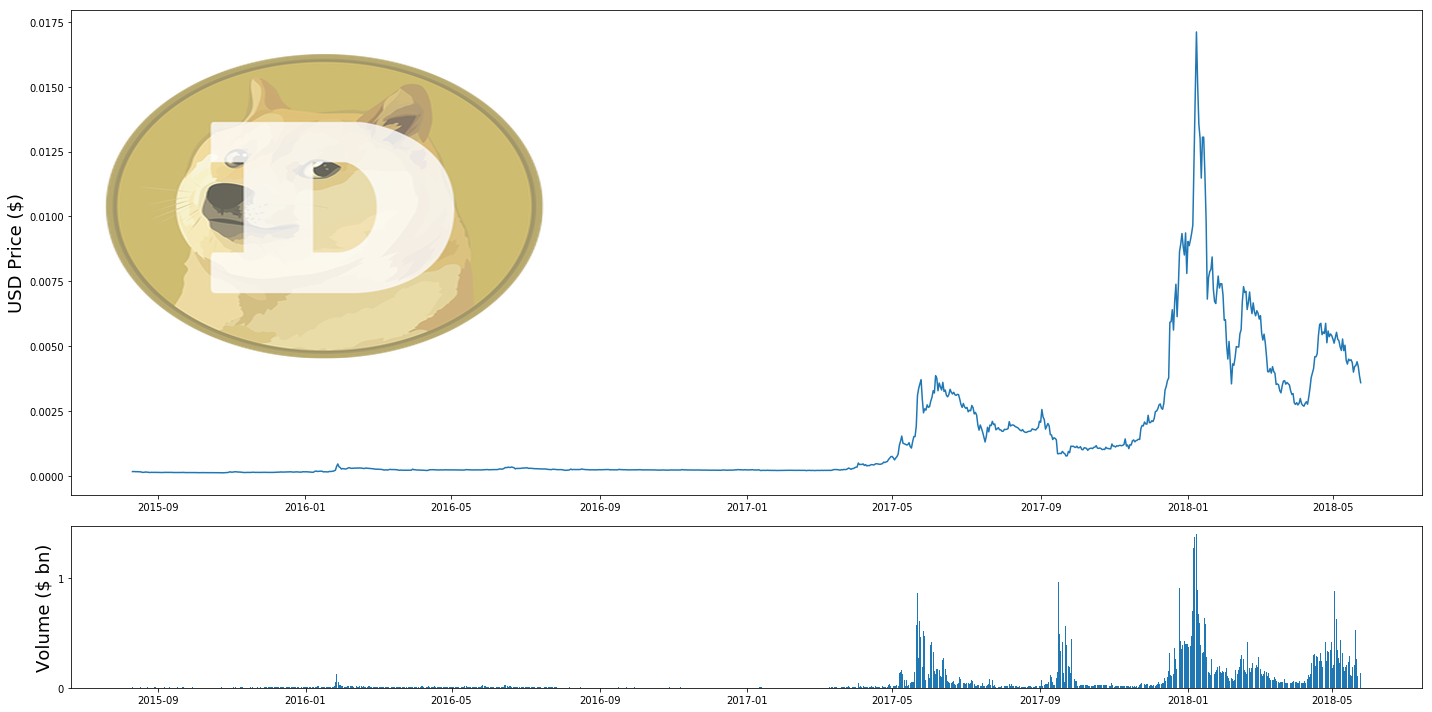

In [11]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]},figsize=(20,10))
ax1.set_ylabel('USD Price ($)',fontsize=18)
ax2.set_ylabel('Volume ($ bn)',fontsize=18)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.plot(merged_data['date'],merged_data['DOGE_price(USD)'])
ax2.bar(merged_data['date'].values, merged_data['DOGE_txVolume(USD)'].values)
fig.tight_layout()
fig.figimage(doge_im, 100, 350, zorder=3,alpha=.7)

plt.show()

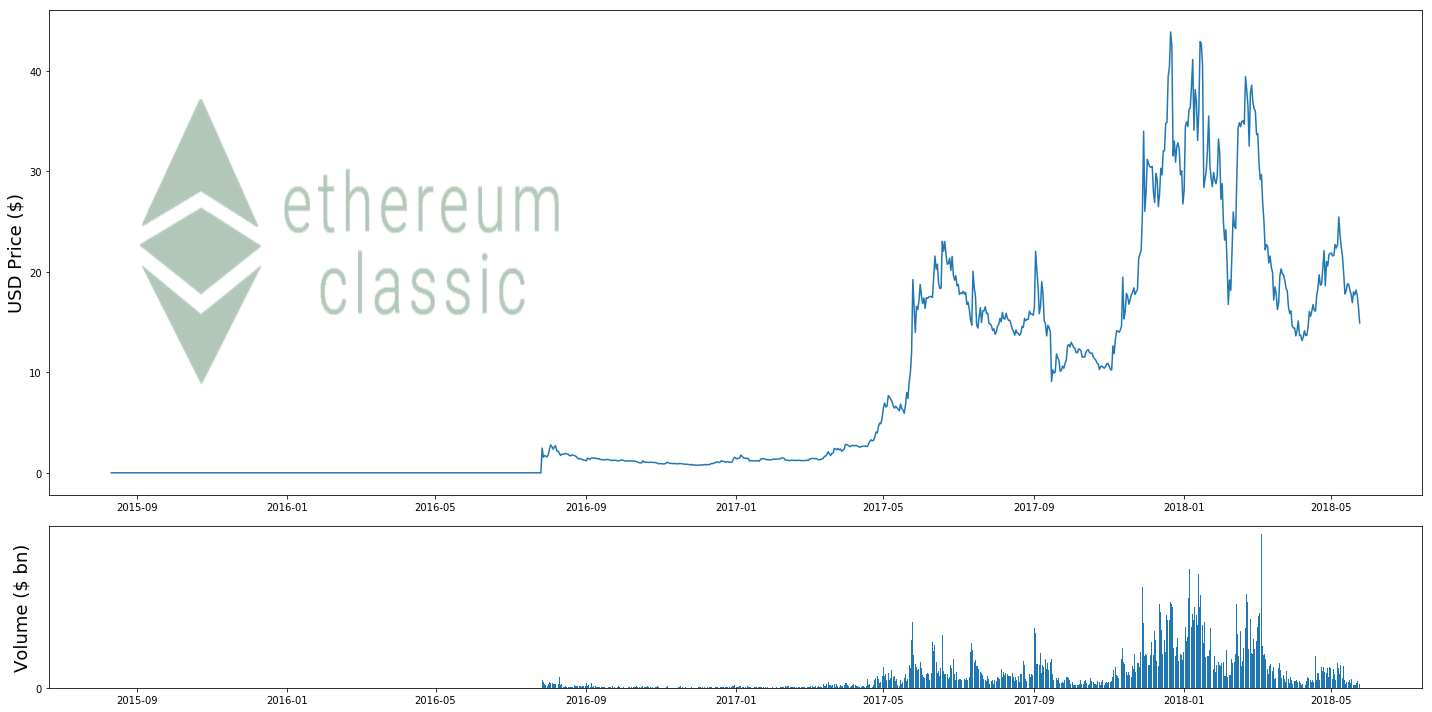

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]},figsize=(20,10))
ax1.set_ylabel('USD Price ($)',fontsize=18)
ax2.set_ylabel('Volume ($ bn)',fontsize=18)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.plot(merged_data['date'],merged_data['ETC_price(USD)'])
ax2.bar(merged_data['date'].values, merged_data['ETC_txVolume(USD)'].values)
fig.tight_layout()
fig.figimage(etc_im, 100, 300, zorder=3,alpha=.5)

plt.show()

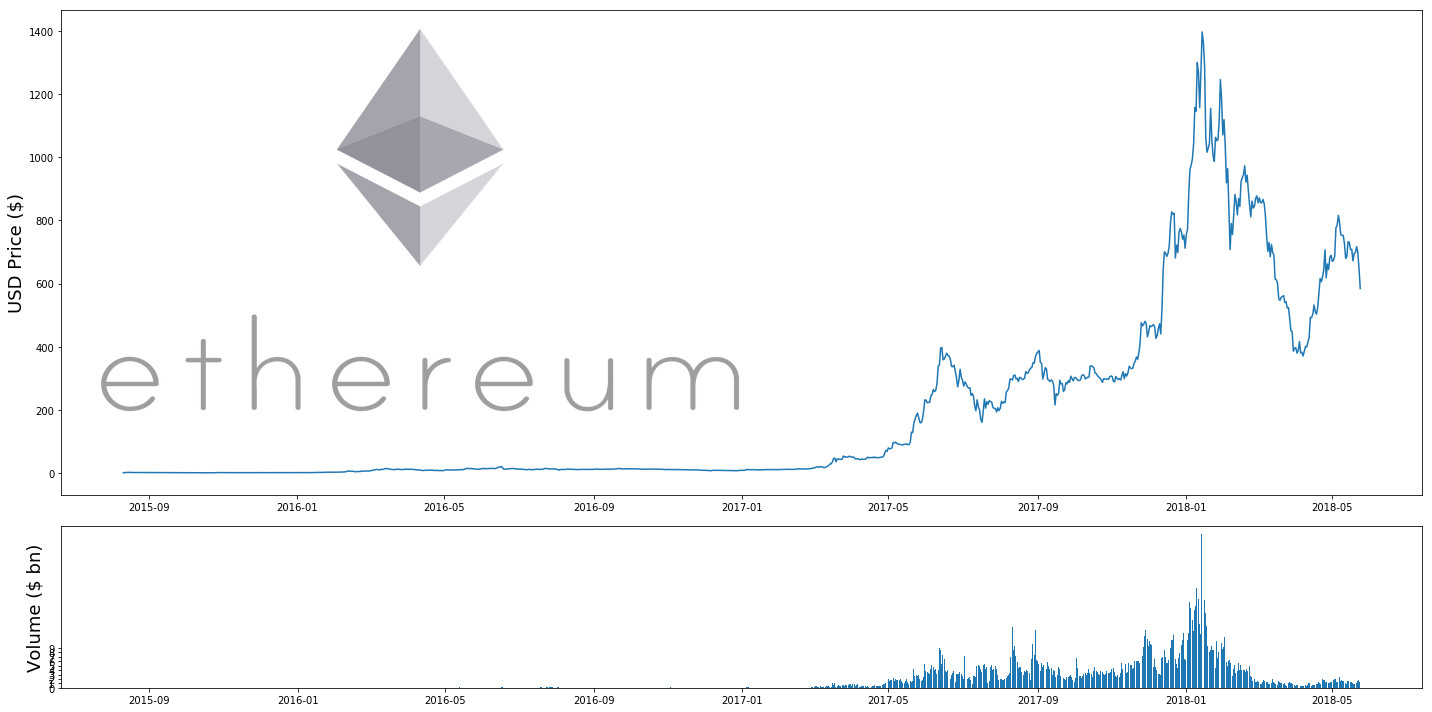

In [24]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]},figsize=(20,10))
ax1.set_ylabel('USD Price ($)',fontsize=18)
ax2.set_ylabel('Volume ($ bn)',fontsize=18)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.plot(merged_data['date'],merged_data['ETH_price(USD)'])
ax2.bar(merged_data['date'].values, merged_data['ETH_txVolume(USD)'].values)
fig.tight_layout()
fig.figimage(eth_im, 100, 300, zorder=3,alpha=.5)

plt.show()

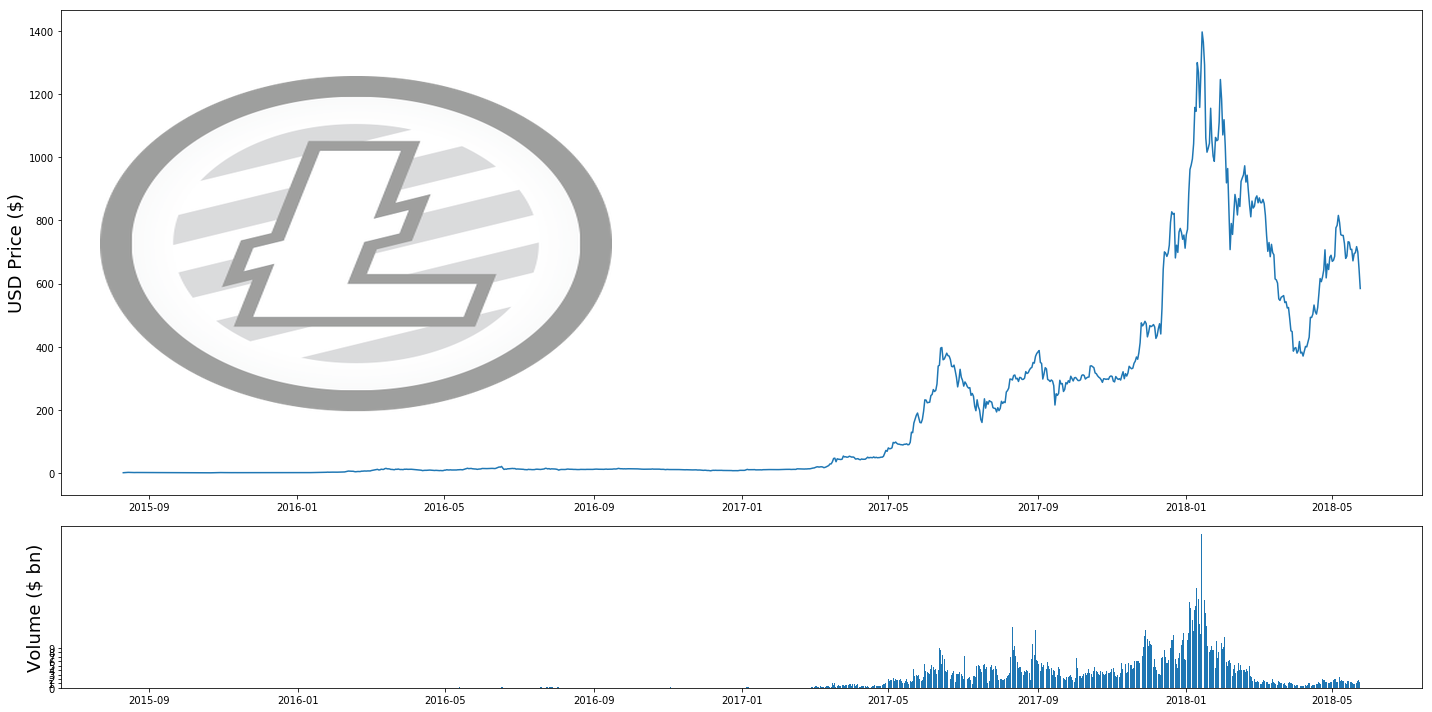

In [31]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]},figsize=(20,10))
ax1.set_ylabel('USD Price ($)',fontsize=18)
ax2.set_ylabel('Volume ($ bn)',fontsize=18)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.plot(merged_data['date'],merged_data['ETH_price(USD)'])
ax2.bar(merged_data['date'].values, merged_data['ETH_txVolume(USD)'].values)
fig.tight_layout()
fig.figimage(ltc_im, 100, 300, zorder=3,alpha=.5)

plt.show()

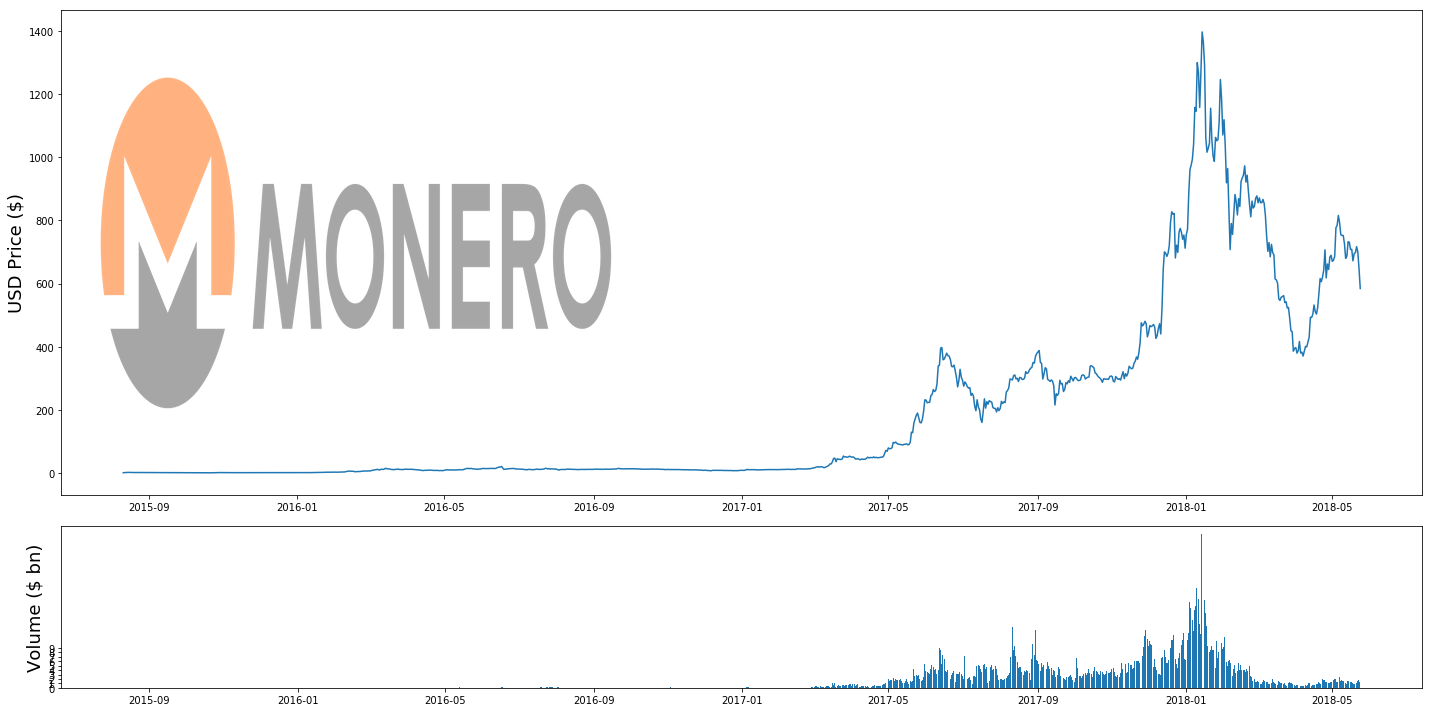

In [48]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]},figsize=(20,10))
ax1.set_ylabel('USD Price ($)',fontsize=18)
ax2.set_ylabel('Volume ($ bn)',fontsize=18)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.plot(merged_data['date'],merged_data['ETH_price(USD)'])
ax2.bar(merged_data['date'].values, merged_data['ETH_txVolume(USD)'].values)
fig.tight_layout()
fig.figimage(xmr_im, 100, 300, zorder=3,alpha=.5)

plt.show()

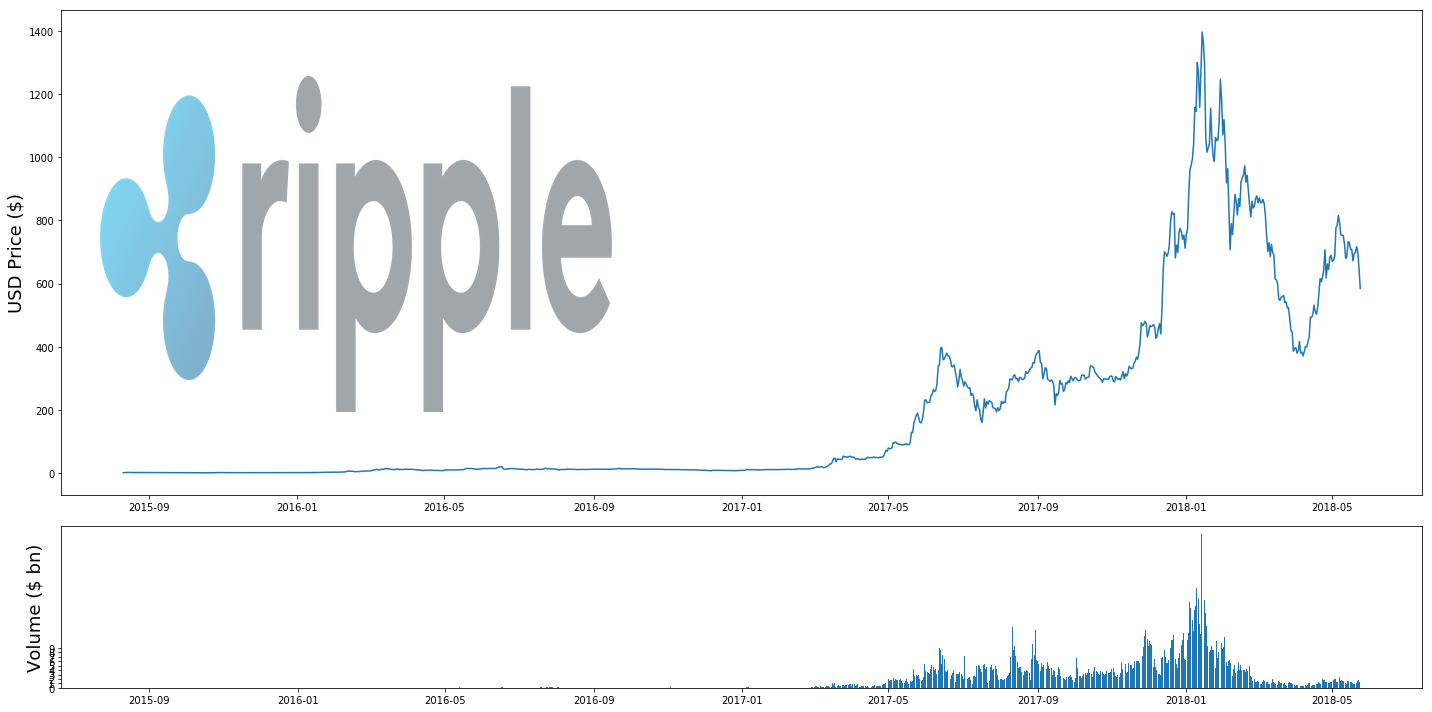

In [43]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]},figsize=(20,10))
ax1.set_ylabel('USD Price ($)',fontsize=18)
ax2.set_ylabel('Volume ($ bn)',fontsize=18)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.plot(merged_data['date'],merged_data['ETH_price(USD)'])
ax2.bar(merged_data['date'].values, merged_data['ETH_txVolume(USD)'].values)
fig.tight_layout()
fig.figimage(xrp_im, 100, 300, zorder=3,alpha=.5)

plt.show()

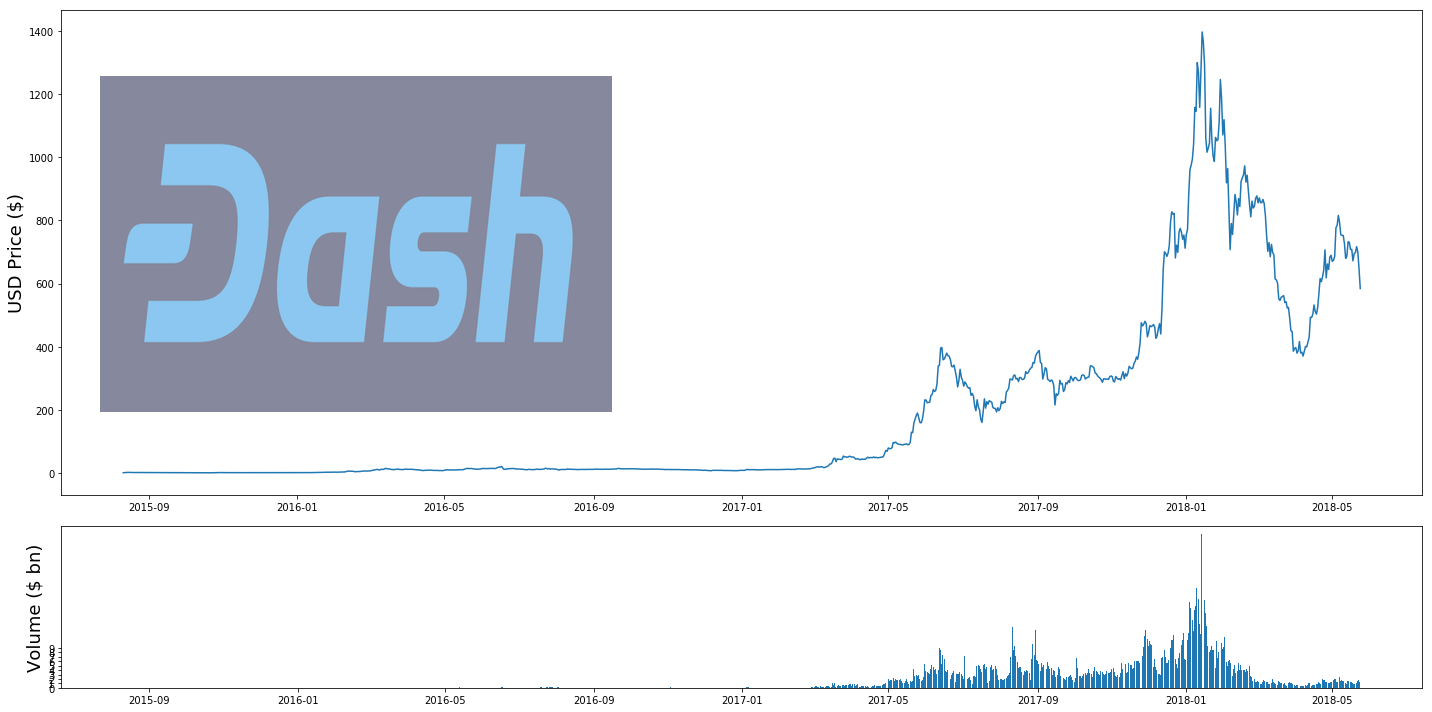

In [34]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]},figsize=(20,10))
ax1.set_ylabel('USD Price ($)',fontsize=18)
ax2.set_ylabel('Volume ($ bn)',fontsize=18)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.plot(merged_data['date'],merged_data['ETH_price(USD)'])
ax2.bar(merged_data['date'].values, merged_data['ETH_txVolume(USD)'].values)
fig.tight_layout()
fig.figimage(dash_im, 100, 300, zorder=3,alpha=.5)

plt.show()

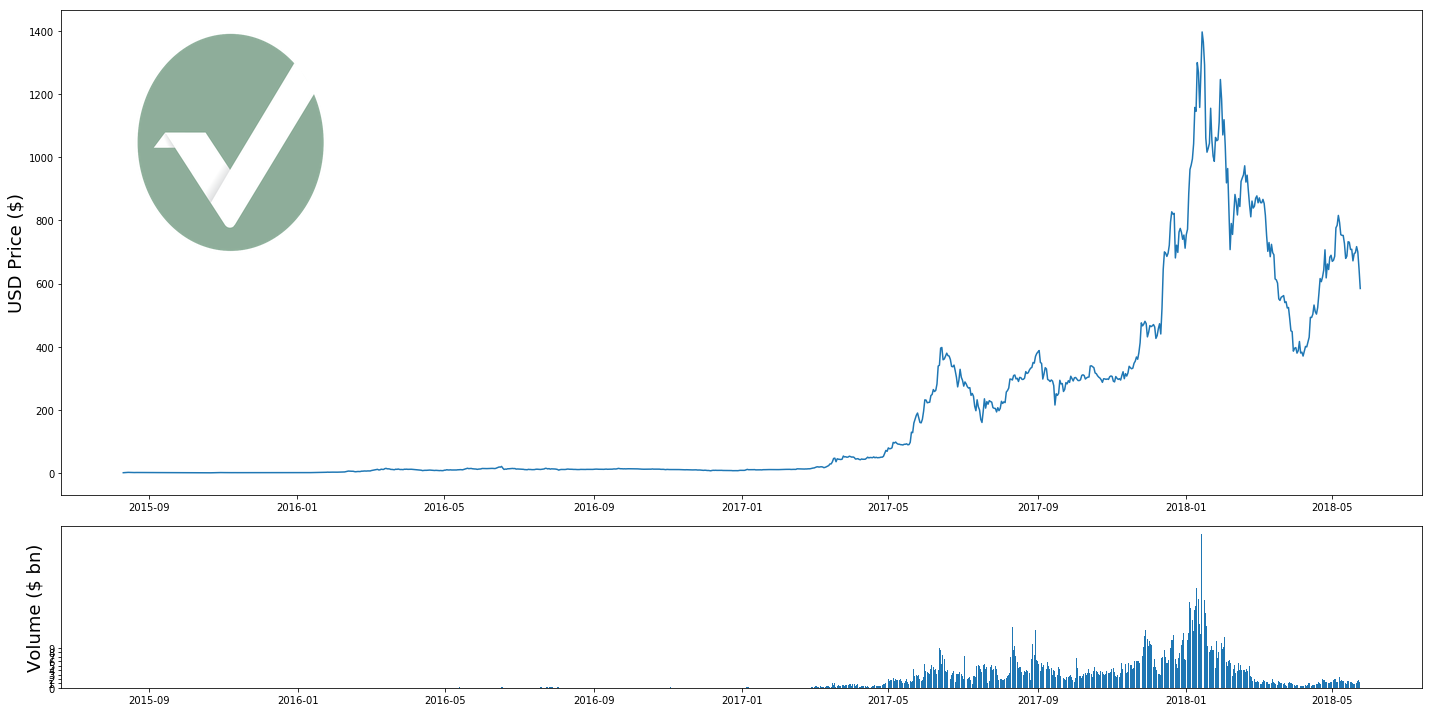

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]},figsize=(20,10))
ax1.set_ylabel('USD Price ($)',fontsize=18)
ax2.set_ylabel('Volume ($ bn)',fontsize=18)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.plot(merged_data['date'],merged_data['ETH_price(USD)'])
ax2.bar(merged_data['date'].values, merged_data['ETH_txVolume(USD)'].values)
fig.tight_layout()
fig.figimage(vtc_im, -20, 400, zorder=3,alpha=.5)

plt.show()